In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import plotly.express as px
import string 
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from string import punctuation

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, classification_report


import re
from pylab import rcParams
from prettytable import PrettyTable
import os
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
emails = pd.read_csv('../input/spam-ham-emails/emails.csv')
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
emails.shape

(5728, 2)

In [4]:
sum(emails['spam']==1) , sum(emails['spam']==0),1368+4360

(1368, 4360, 5728)

In [5]:
max_len = 0
def func(x):
    global max_len
    max_len = max(max_len,len(x))

emails['text'].apply(func)
print(f'MaxLength text in dataset is {max_len}')

MaxLength text in dataset is 43952


- A corpus is a collection of authentic text or audio organized into datasets. Authentic here means text written or audio spoken by a native of the language or dialect. A corpus can be made up of everything from newspapers, novels, recipes, radio broadcasts to television shows, movies, and tweets. In natural language processing, a corpus contains text and speech data that can be used to train AI and machine learning systems. If a user has a specific problem or objective they want to address, they’ll need a collection of data that supports, or at least is a representation of, what they’re looking to achieve with machine learning and NLP.

In [6]:
def create_lower(x):
    return x.lower()

emails['corpus']=emails['text'].apply(create_lower)
emails.sample(5)

,text,spam,corpus
2031,Subject: re : completion of ibuyit request for...,0,subject: re : completion of ibuyit request for...
1641,Subject: drogi vincenty . skoro ty byles na ty...,0,subject: drogi vincenty . skoro ty byles na ty...
2569,Subject: fwd : billing question return - path...,0,subject: fwd : billing question return - path...
3378,Subject: re : joint probabilities michael th...,0,subject: re : joint probabilities michael th...
3101,Subject: wti - new eol product please provide...,0,subject: wti - new eol product please provide...


In [7]:
import re
def remove_punc(x):
    x= re.sub(r'[^\w\s]','',x)
    x = re.sub('_*','',x)
    x = re.sub(' +',' ',x)
    return x

emails['corpus'] =emails['corpus'].apply(remove_punc)

In [8]:
## Cgecking strings after punctuations
emails['corpus'][454]

'subject http www wbm us hello i have visited www wbm us and noticed that your website is not listed on some search engines i am sure that through our service the number of people who visit your website will definitely increase seekercenter is a unique technology that instantly submits your website to over 500 000 search engines and directories a really low cost and effective way to advertise your site for more details please go to seekercenter net give your website maximum exposure today looking forward to hearing from you best regards vanessa lintner sales marketing www seekercenter net you are receiving this email because you opted in to receive special offers through a partner website if you feel that you received this email in error or do not wish to receive additional special offers please enter your email address here and click the button of remove me '

## Stopwords Preprocessing

In [9]:
stop_word = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", \
      "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",\
      "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", \
      "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", \
      "do", "does", "did", "doing", "would", "should", "could", "ought", "i'm", "you're", "he's", "she's",\
      "it's", "we're", "they're", "i've", "you've", "we've", "they've", "i'd", "you'd", "he'd", "she'd", "we'd",\
      "they'd", "i'll", "you'll", "he'll", "she'll", "we'll", "they'll", "isn't", "aren't", "wasn't", "weren't", "hasn't",\
      "haven't", "hadn't", "doesn't", "don't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "can't", "cannot", "couldn't",\
      "mustn't", "let's", "that's", "who's", "what's", "here's", "there's", "when's", "where's", "why's", "how's", "a", "an",\
      "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",\
      "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up",\
      "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when",\
      "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor",\
      "not", "only", "own", "same", "so", "than", "too", "very"}

In [10]:
def remove_sw(x):
    words_wsw = x.split()
    words_wosw = [ word  for word in words_wsw if word not in stop_word]
    ans = " ".join(words_wosw)
    return ans

emails['corpus']=emails['corpus'].apply(remove_sw)

In [11]:
## Now stop word is removed i.e not interested was there earlier
emails['corpus'][0]

'subject naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website will make task much easier promise havinq ordered iogo company will automaticaily become world ieader isguite ciear without good products effective business organization practicable aim will hotat nowadays market promise marketing efforts will become much effective list clear benefits creativeness hand made original logos specially done reflect distinctive company image convenience logo stationery provided formats easy use content management system letsyou change website content even structure promptness will see logo drafts within three business days affordability marketing break shouldn t make gaps budget 100 satisfaction guaranteed provide unlimited amount changes extra fees surethat will love result collaboration look portfolio interested'

- Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language."

In [12]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster=LancasterStemmer()

print("Porter Stemmer")
print(porter.stem("cats"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))
print("Lancaster Stemmer")
print(lancaster.stem("cats"))
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

Porter Stemmer
cat
troubl
troubl
troubl
Lancaster Stemmer
cat
troubl
troubl
troubl


## Stemming 
- ref : https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster=LancasterStemmer()

def stem_sentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

emails['corpus'] = emails['corpus'].apply(stem_sentence)

## After stemming
emails['corpus'][852]

'subject probblem solv save medl prolocutor catlon 60 pharma nettl zmail shop successful proven way sav tombola e m bandeaux oney fertil v lithesom g methodolog l l filament u revision l r welshman untru cla ineleg isv hatr al aeronavig m andmanyoth be sandstorm t prlce wor feather ldwide shlpplng tota inspiss l confidentiai 5 miliion cu euphon stomer nice day chipboard '

## Document Term Matrix

In [16]:
from collections import defaultdict
dtm = defaultdict(int)
def create_dtm(text):
    for word in text.split():
        dtm[word]+=1
    
    dtm
    
emails['corpus'].apply(create_dtm)
print(f'DTM VALUE = {len(dtm)}')

DTM VALUE = 29302


In [19]:
emails.columns

Index(['text', 'spam', 'corpus'], dtype='object')

In [21]:
# Independent attributes
X = emails['corpus']

# Dependent attributes
Y = emails['spam']

In [23]:
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

In [25]:
X_vec.toarray().shape

(5728, 29267)

In [26]:
X_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Problem 3.1 – Building machine learning models

In [27]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_vec.toarray(), Y, test_size=0.20, random_state=21)

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

## Prediction

In [29]:
rf_pred_labels = clf.predict(X_test)

## Accuracy 

In [30]:
accuracy_rf = accuracy_score(y_test, rf_pred_labels) * 100
print('Accuracy (Random Forest): ', round(accuracy_rf, 4), "%")

Accuracy (Random Forest):  97.644 %


### Confusion Matrix

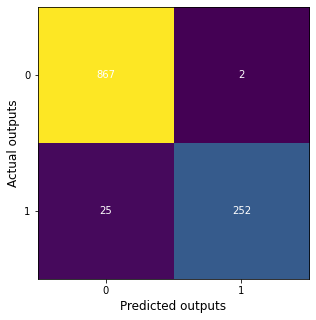

In [31]:
cm = confusion_matrix(y_test, rf_pred_labels)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Specificity
<img src="https://geekymedics.com/wp-content/uploads/2018/06/Specificity-equation.jpg" width="500" height="600"/>


In [34]:
specificity_rf = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (Random Forest): ', round(specificity_rf, 4), "%")

Specificity (Random Forest):  99.7699 %


In [35]:
print(classification_report(y_test, rf_pred_labels))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       869
           1       0.99      0.91      0.95       277

    accuracy                           0.98      1146
   macro avg       0.98      0.95      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [36]:
y_prob = clf.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(clf.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc_rf = auc(fpr, tpr)

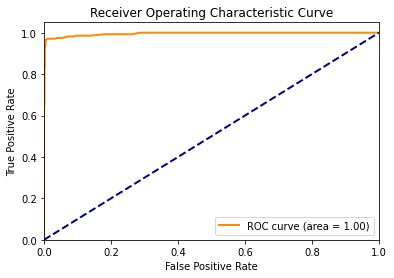

In [37]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_rf,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [38]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [39]:
pred_labels = nb_model.predict(X_test)

In [40]:
## Accuracy of naive bayes
accuracy_naive_bayes = accuracy_score(y_test, pred_labels) * 100
print('Accuracy (Naive Bayes): ', round(accuracy_naive_bayes, 4), "%")

Accuracy (Naive Bayes):  98.7784 %


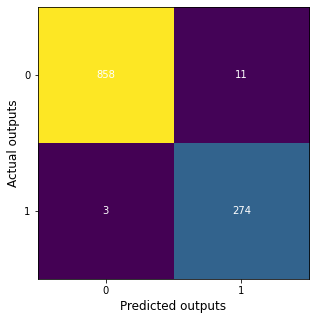

In [41]:
cm = confusion_matrix(y_test, pred_labels)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [42]:
specificity_naive_bayes = cm[0,0]/(cm[0,0]+cm[0,1]) * 100
print('Specificity (Naive Bayes): ', round(specificity_naive_bayes, 4), "%")

Specificity (Naive Bayes):  98.7342 %


In [43]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       869
           1       0.96      0.99      0.98       277

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [44]:
y_prob = nb_model.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(nb_model.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc_nb = auc(fpr, tpr)

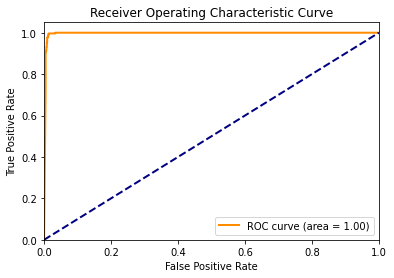

In [45]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_nb,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

## CART

In [46]:
cart_clf = DecisionTreeClassifier(criterion='gini')
cart_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
cart_pred_labels = cart_clf.predict(X_test)

In [69]:
train_accuracy_cart = accuracy_score(cart_clf.predict(X_train), y_train) * 100
print('Train Accuracy (CART): ', round(train_accuracy_cart, 4), "%")

Train Accuracy (CART):  100.0 %


In [48]:
accuracy_cart = accuracy_score(y_test, cart_pred_labels) * 100
print('Accuracy (CART): ', round(accuracy_cart, 4), "%")

Accuracy (CART):  95.288 %


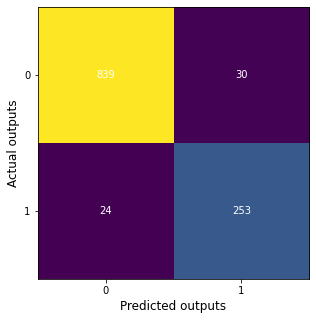

In [49]:
cm = confusion_matrix(y_test, cart_pred_labels)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## SPDTM

In [67]:
total_cnt = X.shape[0]

In [84]:
dtm = X_vec.toarray()
dtmd = dtm>0

In [92]:
to_remove = []
cnt_val = dtmd.sum(axis=1)
for i in range(len(cnt_val)):
    cnt = cnt_val[i]
    perc = round((cnt/total_cnt),4)*100
    if perc < 5:
        to_remove.append(i)
        
len(to_remove)

5558

In [99]:
spdtm = np.delete(dtm,to_remove,axis=1)

In [101]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(spdtm, Y, test_size=0.20, random_state=21)

In [102]:
spdtm.shape

## So now features from 29267 were reduced to 23709 reducing the features 

(5728, 23709)

## Modelling on spdtm

In [103]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
rf_pred_labels_spdtm = clf2.predict(X_test)
accuracy_rf_spdtm = accuracy_score(y_test, rf_pred_labels_spdtm) * 100
print('Accuracy (Random Forest): ', round(accuracy_rf_spdtm, 4), "%")

Accuracy (Random Forest):  97.3822 %


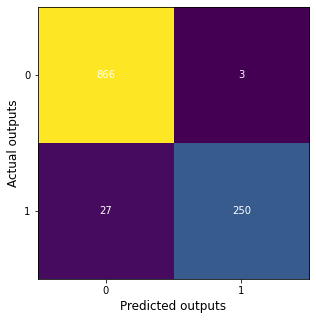

In [105]:
cm = confusion_matrix(y_test, rf_pred_labels_spdtm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Conclusion
- Dataset